In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd "/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD"

/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD


In [ ]:
path = "/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/HealthyMeander/HealthyMeander/mea1-H1.jpg"

In [ ]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [ ]:
Network = VGG19
model = Network(weights="imagenet")

image = load_img(path, target_size=inputShape)
image = img_to_array(image)


574717952/574710816 [==============================] - 5s 0us/step


In [ ]:
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through the network
image = np.expand_dims(image, axis=0)
print(image.shape)
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

(1, 224, 224, 3)


In [ ]:
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

40960/35363 [==================================] - 0s 0us/step


In [ ]:
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. switch: 22.54%
2. mousetrap: 16.47%
3. packet: 7.72%
4. walking_stick: 6.82%
5. envelope: 5.70%


In [ ]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread(path)
(imagenetID, label, prob) = P[0][0]
orig=cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

In [ ]:
  from google.colab.patches import cv2_imshow

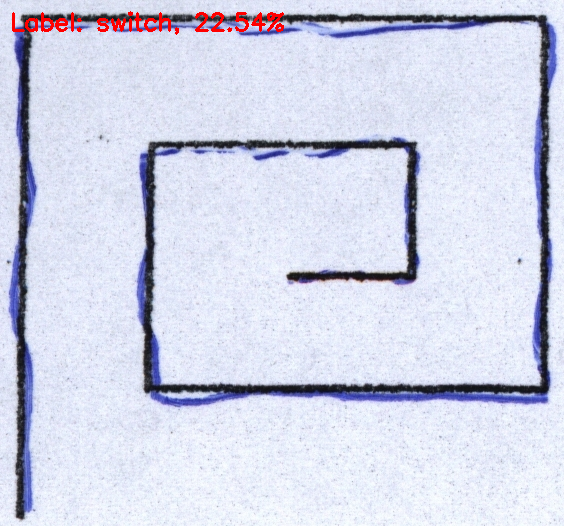

In [ ]:
cv2_imshow(orig)


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        vertical_flip=True,
        horizontal_flip = True, 
    ) 
    
# Loading a sample image
for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/PatientMeander/PatientMeander'):
    img = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/PatientMeander/PatientMeander/'+filepath, target_size=inputShape)
    # Converting the input sample image to an array 
    x = img_to_array(img) 
    # Reshaping the input image 
    x = x.reshape((1, ) + x.shape)  
      
    # Generating and saving 5 augmented samples  
    # using the above defined parameters.  
    i = 0
    for batch in datagen.flow(x, batch_size = 1, 
                              save_to_dir ='PatientMeanderwithAug',  
                               save_format ='jpeg'): 
        i += 1
        if i > 5: 
            break


In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        vertical_flip=True,
        horizontal_flip = True, 
    ) 
    
# Loading a sample image
for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/HealthyMeander/HealthyMeander'):
    img = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/HealthyMeander/HealthyMeander/'+filepath, target_size=inputShape)
    # Converting the input sample image to an array 
    x = img_to_array(img) 
    # Reshaping the input image 
    x = x.reshape((1, ) + x.shape)  
      
    # Generating and saving 5 augmented samples  
    # using the above defined parameters.  
    i = 0
    for batch in datagen.flow(x, batch_size = 1, 
                              save_to_dir ='HealthyMeanderwithAug',  
                               save_format ='jpeg'): 
        i += 1
        if i > 5: 
            break


In [ ]:
import os
X = []
Y= []
for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/PatientMeanderwithAug'):
    image = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/PatientMeanderwithAug/'+filepath, target_size=inputShape)
    image = img_to_array(image)
    X.append(image)
    Y.append(1)

for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/HealthyMeanderwithAug'):
    image = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/HealthyMeanderwithAug/'+filepath, target_size=inputShape)
    image = img_to_array(image)
    X.append(image)
    Y.append(0)
    
first_frame = X[0]
print(first_frame.shape)

(224, 224, 3)


In [ ]:
len(X)
len(Y)

1526

In [ ]:
X=np.array(X)
import numpy as np
X = np.array(X)
Y = np.array(Y)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]
X

array([[[[221., 232., 216.],
         [227., 235., 237.],
         [233., 238., 255.],
         ...,
         [242., 246., 247.],
         [245., 249., 250.],
         [248., 252., 253.]],

        [[231., 242., 228.],
         [232., 240., 243.],
         [235., 240., 255.],
         ...,
         [244., 248., 249.],
         [245., 249., 250.],
         [246., 250., 251.]],

        [[238., 248., 237.],
         [233., 241., 244.],
         [233., 238., 255.],
         ...,
         [246., 250., 251.],
         [245., 249., 250.],
         [244., 248., 249.]],

        ...,

        [[231., 235., 246.],
         [235., 239., 250.],
         [236., 240., 251.],
         ...,
         [239., 241., 253.],
         [242., 244., 255.],
         [244., 246., 255.]],

        [[232., 236., 247.],
         [236., 240., 251.],
         [237., 241., 252.],
         ...,
         [234., 236., 248.],
         [236., 238., 250.],
         [238., 240., 252.]],

        [[231., 235., 246.],
       

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train
Y_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
len(X_train)

1220

In [ ]:
from collections import Counter
Counter(Y_train)

Counter({0: 640, 1: 580})

In [ ]:
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
model = Network(weights="imagenet",include_top=False)
x=model.output
x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(1,activation='sigmoid')(x) #final layer with softmax activation

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model=Model(inputs=model.input,outputs=preds)

In [ ]:
len(model.layers)

26

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [ ]:
for layer in model.layers[:23]:
    layer.trainable=False
for layer in model.layers[23:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train=np.array(X_train)
X_train

array([[[[232., 237., 241.],
         [235., 240., 246.],
         [237., 241., 252.],
         ...,
         [245., 248., 255.],
         [243., 246., 253.],
         [238., 241., 248.]],

        [[233., 238., 242.],
         [236., 241., 247.],
         [239., 243., 254.],
         ...,
         [243., 246., 255.],
         [240., 243., 252.],
         [234., 237., 244.]],

        [[232., 237., 243.],
         [235., 240., 246.],
         [237., 241., 252.],
         ...,
         [240., 242., 254.],
         [236., 239., 248.],
         [230., 233., 242.]],

        ...,

        [[244., 249., 253.],
         [242., 247., 251.],
         [240., 245., 249.],
         ...,
         [235., 238., 245.],
         [241., 244., 251.],
         [246., 249., 255.]],

        [[243., 248., 252.],
         [241., 246., 250.],
         [239., 244., 248.],
         ...,
         [238., 241., 248.],
         [241., 244., 249.],
         [244., 247., 252.]],

        [[250., 255., 255.],
       

In [ ]:
history=model.fit(X_train,np.array(Y_train),epochs=10,validation_data=(X_test, np.array(Y_test)))

Epoch 1/10
39/39 [==============================] - 941s 24s/step - loss: 1.0778 - accuracy: 0.7918 - val_loss: 0.4090 - val_accuracy: 0.7941
Epoch 2/10
39/39 [==============================] - 943s 24s/step - loss: 0.2354 - accuracy: 0.8926 - val_loss: 0.3731 - val_accuracy: 0.8529
Epoch 3/10
39/39 [==============================] - 947s 24s/step - loss: 0.1350 - accuracy: 0.9459 - val_loss: 0.1486 - val_accuracy: 0.9379
Epoch 4/10
39/39 [==============================] - 947s 24s/step - loss: 0.1227 - accuracy: 0.9475 - val_loss: 0.1334 - val_accuracy: 0.9379
Epoch 5/10
39/39 [==============================] - 947s 24s/step - loss: 0.0645 - accuracy: 0.9746 - val_loss: 0.1007 - val_accuracy: 0.9510
Epoch 6/10
39/39 [==============================] - 952s 24s/step - loss: 0.0306 - accuracy: 0.9926 - val_loss: 0.0839 - val_accuracy: 0.9575
Epoch 7/10
39/39 [==============================] - 947s 24s/step - loss: 0.0171 - accuracy: 0.9984 - val_loss: 0.0779 - val_accuracy: 0.9575
Epoch 

In [ ]:
preds=model.predict(X_train)


In [ ]:
history

In [ ]:
preds

array([[8.8349593e-01],
       [1.3790333e-11],
       [2.3704767e-04],
       ...,
       [9.8759723e-01],
       [3.2799617e-06],
       [6.0972571e-04]], dtype=float32)

In [ ]:
print(history.keys())

AttributeError: ignored

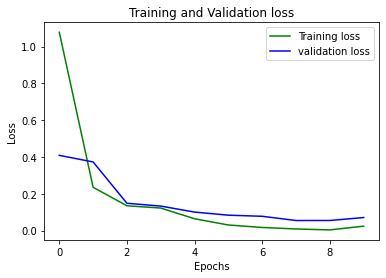

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('trace.png')

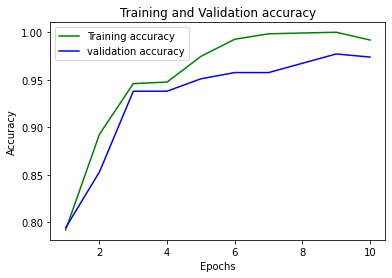

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.savefig('trace2.png')

In [ ]:
preds[preds>0.5]=1
preds[preds<0.5]=0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, preds)

array([[640,   0],
       [  0, 580]])

In [ ]:
preds=model.predict(X_test)


In [ ]:
preds

array([[1.8270707e-01],
       [2.6909461e-06],
       [9.6718228e-01],
       [8.2251379e-11],
       [9.2135274e-01],
       [9.9800098e-01],
       [1.0920495e-02],
       [9.6431541e-01],
       [1.9103289e-04],
       [9.9952447e-01],
       [9.2343807e-01],
       [1.1773886e-07],
       [4.2596361e-07],
       [9.9915254e-01],
       [1.0575695e-07],
       [1.9750050e-07],
       [9.9952447e-01],
       [6.9245731e-10],
       [7.7228464e-09],
       [9.9998116e-01],
       [9.9861860e-01],
       [4.0635673e-08],
       [9.9997318e-01],
       [9.1423074e-09],
       [9.9950570e-01],
       [9.1900587e-02],
       [9.9977732e-01],
       [8.0640078e-01],
       [9.9444777e-01],
       [2.3562998e-02],
       [9.9947023e-01],
       [5.0513975e-08],
       [9.2853433e-01],
       [3.7972945e-09],
       [9.9576503e-01],
       [6.6751242e-04],
       [9.9999809e-01],
       [9.9643910e-01],
       [9.7761595e-01],
       [1.1461933e-07],
       [5.8041530e-11],
       [2.886305

In [ ]:
preds[preds>0.5]=1
preds[preds<0.5]=0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, preds)

array([[162,   4],
       [  4, 136]])

In [ ]:
image = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/check1.jpeg')
image = img_to_array(image)
image

array([[[ 11., 144., 245.],
        [ 51., 162., 244.],
        [ 56., 135., 194.],
        ...,
        [ 58., 134., 196.],
        [ 54., 160., 248.],
        [ 14., 142., 249.]],

       [[ 56., 167., 249.],
        [174., 255., 255.],
        [212., 255., 255.],
        ...,
        [213., 255., 255.],
        [177., 255., 255.],
        [ 59., 165., 253.]],

       [[ 54., 133., 192.],
        [204., 255., 255.],
        [235., 255., 255.],
        ...,
        [238., 255., 255.],
        [205., 255., 255.],
        [ 56., 132., 194.]],

       ...,

       [[ 56., 135., 194.],
        [202., 255., 255.],
        [235., 255., 255.],
        ...,
        [238., 255., 255.],
        [203., 255., 255.],
        [ 58., 134., 196.]],

       [[ 54., 165., 247.],
        [158., 246., 255.],
        [201., 255., 255.],
        ...,
        [202., 255., 255.],
        [161., 244., 255.],
        [ 57., 163., 251.]],

       [[ 16., 149., 250.],
        [ 51., 162., 244.],
        [ 57., 1

In [ ]:
pwd

'/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD'

In [ ]:
cd gdrive

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD


In [ ]:
cd My\ Drive

[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD


In [ ]:
cd MajorProjectNotebooks/

[Errno 2] No such file or directory: 'MajorProjectNotebooks/'
/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD


In [ ]:
from tensorflow.keras.models import model_from_json
def saveModel(model):
    model_json = model.to_json()
    with open("FinalNewVGG19AugMeander10EpochAcc1.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("FinalNewVGG19AugMeander10EpochAcc1.h5")
    print('Model Saved')
saveModel(model)

Model Saved


In [ ]:
%cd "/Spiral_NewHandPD"

[Errno 2] No such file or directory: '/Spiral_NewHandPD'
/content/gdrive/My Drive/MajorProjectNotebooks/Spiral_NewHandPD


In [ ]:
%cd "/content/gdrive/My Drive/MajorProjectNotebooks"

/content/gdrive/My Drive/MajorProjectNotebooks


In [ ]:
pwd

'/content/gdrive/My Drive/MajorProjectNotebooks'

In [ ]:
ls

 keras-networks/
 Meander_NewHandPD/
 modelNew.json
 Spiral_HandPD/
 Spiral_NewHandPD/
 Test/
'ToTestSpiral '/
 TraceTest_Trial.ipynb
 TraceTest_VGG19.ipynb
 Train/
 vgg16ithAugmentation_traintextsplit_15epoch.h5
 Vgg16withAugmentation_traintextsplit_15epoch.json
 VGG19_Augmented.h5
 VGG19withAugmentation_traintextsplit_15epoch.h5
 VGG19withAugmentation_traintextsplit_15epoch.json
 VGG19withoutAugmentation.h5
 VGG19withoutAugmentation.json
 Vgg19withoutAugmentation_traintest80-20propersplit_10epoch_meander.h5
 Vgg19withoutAugmentation_traintest80-20propersplit_10epoch_meander.json
 Vgg19withoutAugmentation_traintestrandomsplit_10epoch_meander.h5
 Vgg19withoutAugmentation_traintestrandomsplit_10epoch_meander.json
 XceptionwithAugmentation_traintextsplit_15epoch.h5
 XceptionwithAugmentation_traintextsplit_15epoch.json


In [ ]:
path = "/content/gdrive/My Drive/MajorProjectNotebooks/Meander_NewHandPD/check4.jpeg"
image = load_img(path, target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0) 
print(image.shape)
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
# image = preprocess(image)
preds = model.predict(image)
print(preds)

(1, 224, 224, 3)
[[4.9496975e-07]]


In [4]:
from tensorflow.keras.models import model_from_json
def loadModel():
    json_file = open('NewVGG19AugMeander10EpochAcc1.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("NewVGG19AugMeander10EpochAcc1.h5")
    print("Loaded model from disk")
    return loaded_model

In [5]:
model = loadModel()

Loaded model from disk


In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [ ]:
len(model.layers)

26

In [ ]:
for layer in model.layers[:23]:
    layer.trainable=False
for layer in model.layers[23:]:
    layer.trainable=True

In [ ]:
inputShape = (224, 224)
import os
X = []
Y= []
for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_HandPD/MeanderPatients'):
    image = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_HandPD/MeanderPatients/'+filepath, target_size=inputShape)
    image = img_to_array(image)
    X.append(image)
    Y.append(1)

for filepath in os.listdir('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_HandPD/MeanderControl'):
    image = load_img('/content/gdrive/My Drive/MajorProjectNotebooks/Meander_HandPD/MeanderControl/'+filepath, target_size=inputShape)
    image = img_to_array(image)
    X.append(image)
    Y.append(0)
    
first_frame = X[0]
print(first_frame.shape)

(224, 224, 3)


In [ ]:
X=np.array(X)

In [ ]:
preds=model.predict(X)


In [ ]:
preds

array([[0.9297122 ],
       [0.87102187],
       [0.98866093],
       [0.8542979 ],
       [0.8568507 ],
       [0.98495674],
       [0.77026784],
       [0.9890301 ],
       [0.936985  ],
       [0.9870789 ],
       [0.3031393 ],
       [0.77438205],
       [0.63367724],
       [0.99501115],
       [0.80336905],
       [0.9584296 ],
       [0.99623716],
       [0.9815478 ],
       [0.998409  ],
       [0.9996096 ],
       [0.946285  ],
       [0.9999335 ],
       [0.9710798 ],
       [0.9999454 ],
       [0.9649761 ],
       [0.96636355],
       [0.9293339 ],
       [0.98719263],
       [0.9296901 ],
       [0.98342645],
       [0.9956479 ],
       [0.9936985 ],
       [0.998683  ],
       [0.998525  ],
       [0.99774635],
       [0.99287134],
       [0.97119254],
       [0.52582395],
       [0.884229  ],
       [0.9991795 ],
       [0.5660336 ],
       [0.7930726 ],
       [0.8906425 ],
       [0.9955773 ],
       [0.9811089 ],
       [0.9685508 ],
       [0.15313429],
       [0.151

In [ ]:
preds[preds>0.5]=1
preds[preds<0.5]=0

In [ ]:
Y=np.array(Y)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, preds)

array([[ 49,  23],
       [ 17, 279]])

In [ ]:
from tensorflow.keras.models import model_from_json
def loadModel():
    json_file = open('Vgg19withoutAugmentation_traintest80-20propersplit_10epoch_meander.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("Vgg19withoutAugmentation_traintest80-20propersplit_10epoch_meander.h5")
    print("Loaded model from disk")
    return loaded_model

In [ ]:
model = loadModel()

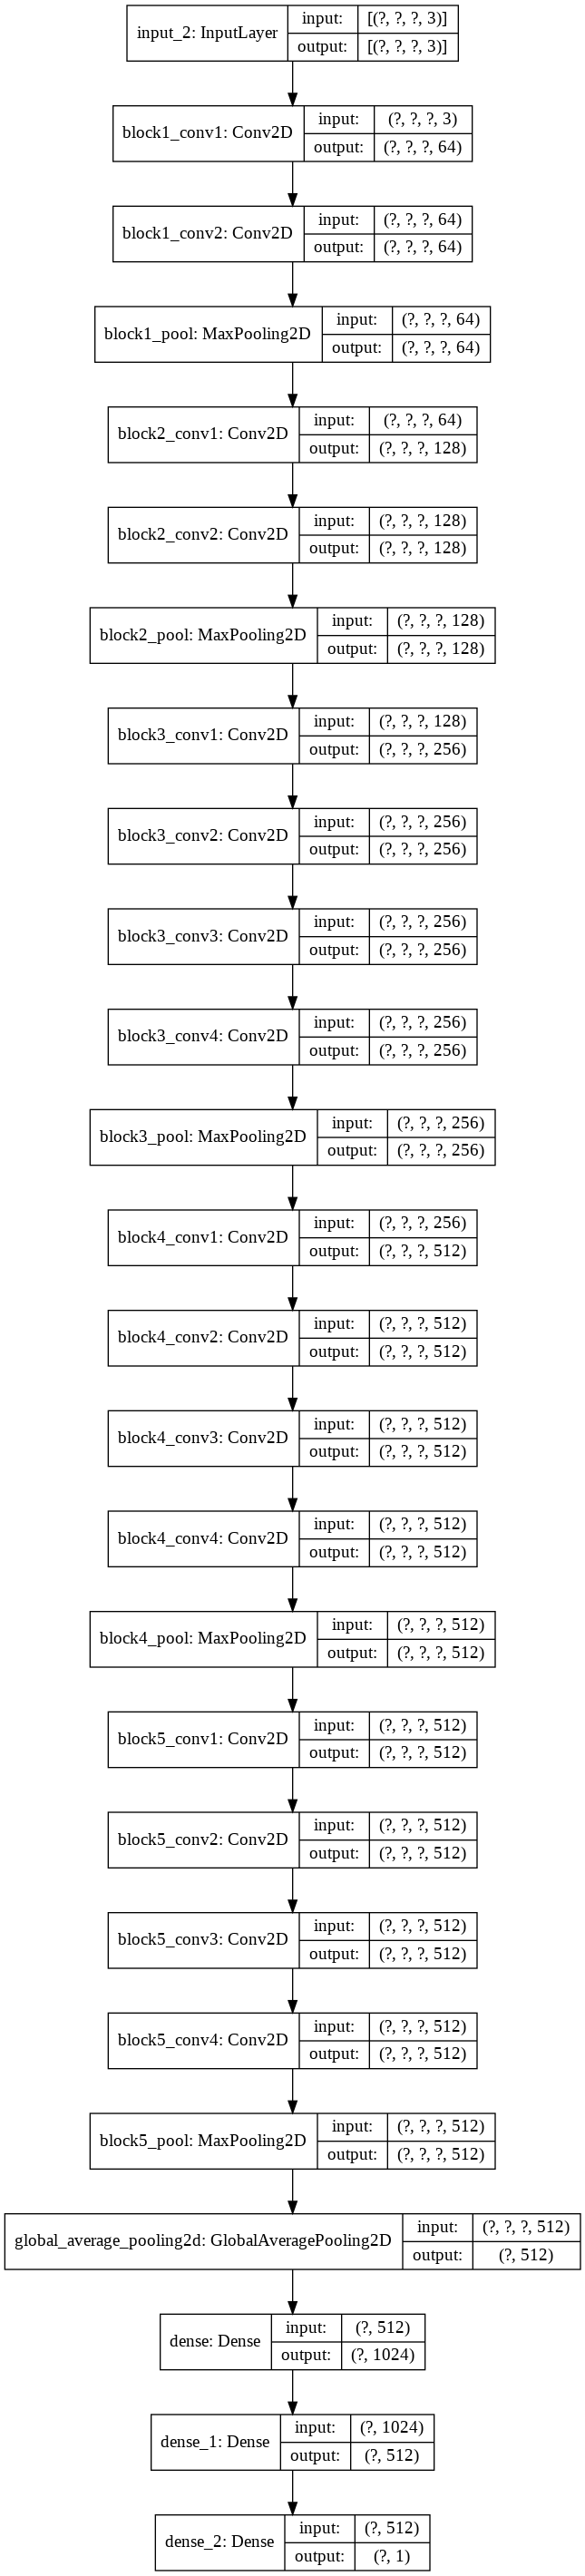

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)